# Initial

In [1]:
import matplotlib.pyplot as plt
from ann_models import fomc_model_store
import pandas as pd
import math
import random

In [2]:
a = fomc_model_store()
models = a.get_models()

/Users/xander/Desktop/github/senior_thesis/ann_models.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['MID_PRICE'] = (taq_df['BID'] + taq_df['ASK']) / 2
/Users/xander/Desktop/github/senior_thesis/ann_models.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taq_df['TRADE_DIRECTION'] = taq_df.apply(lee_ready_algorithm, axis=1)
/Users/xander/Desktop/github/senior_thesis/ann_models.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats i

152
date: 2013-04-10 14:00:00


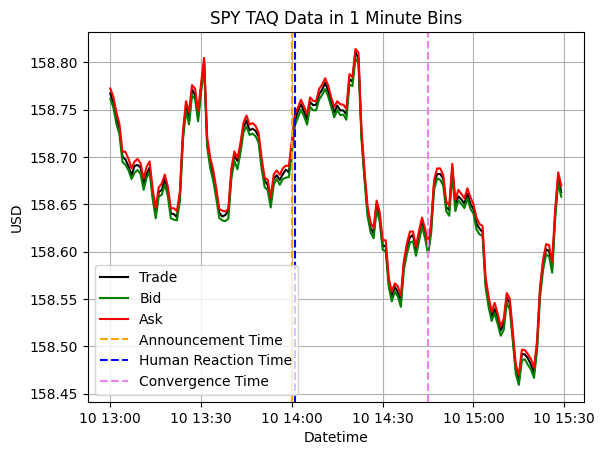

date: 2019-07-10 14:00:00


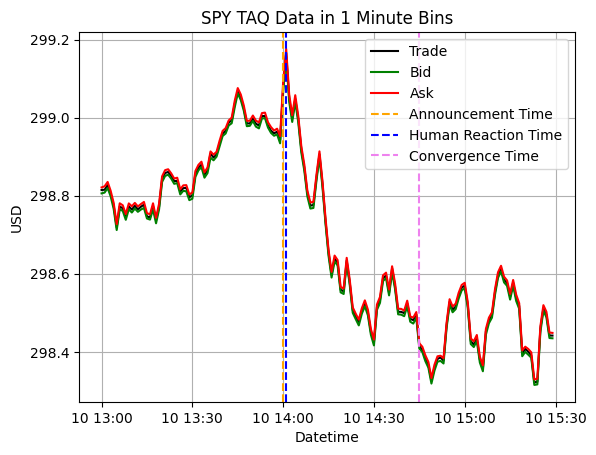

date: 2009-07-15 14:00:00


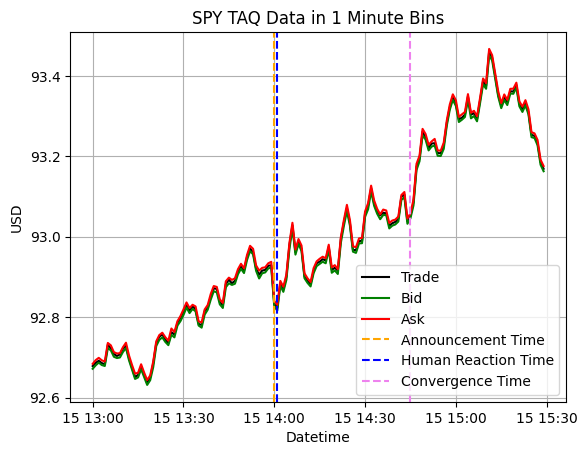

In [6]:
# plot sample of trade data 
print(len(models))
samples_i = [0,20,80]
for i in samples_i:
  model = models[i]
  print(f"date: {model.time_n}")
  model.plot_bin()

Text(0, 0.5, 'frequency')

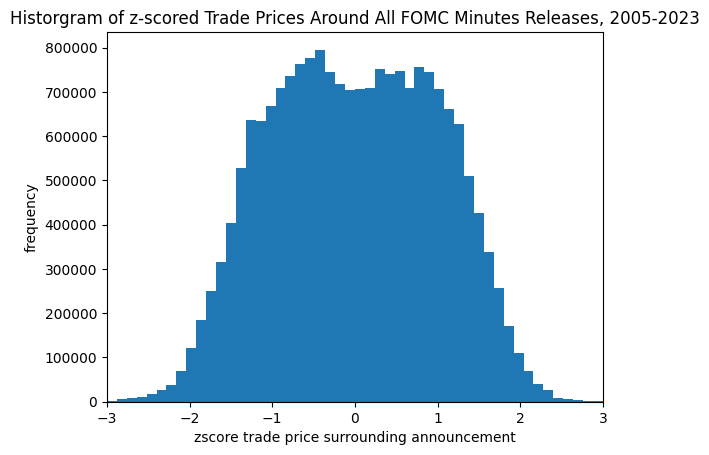

In [7]:
# plot the histogram of zscored trade prices
from scipy.stats import zscore
zscore_trade_prices = []
for model in models:
  zscore_trade_prices += list(zscore(list(model.df['PRICE'])))

mean_value = 0
std_dev = 1
plt.hist(zscore_trade_prices, bins=50, range=(mean_value - 3 * std_dev, mean_value + 3 * std_dev))
plt.xlim(mean_value - 3 * std_dev, mean_value + 3 * std_dev)
plt.title("Historgram of z-scored Trade Prices Around All FOMC Minutes Releases, 2005-2023")
plt.xlabel("zscore trade price surrounding announcement")
plt.ylabel("frequency")

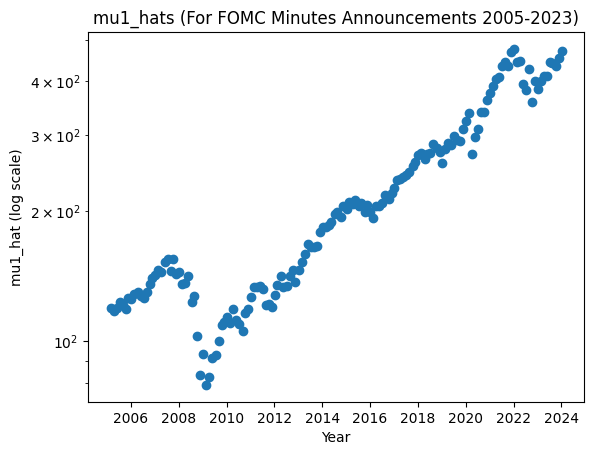

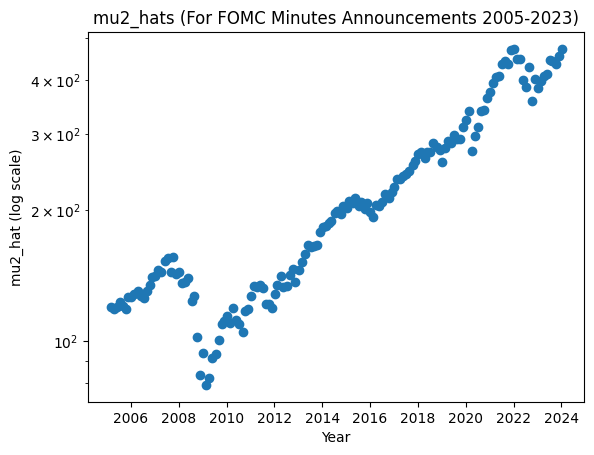

/Users/xander/.pyenv/versions/3.9.15/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: All values for SymLogScale are below linthresh, making it effectively linear. You likely should lower the value of linthresh. 
  fig.canvas.print_figure(bytes_io, **kw)


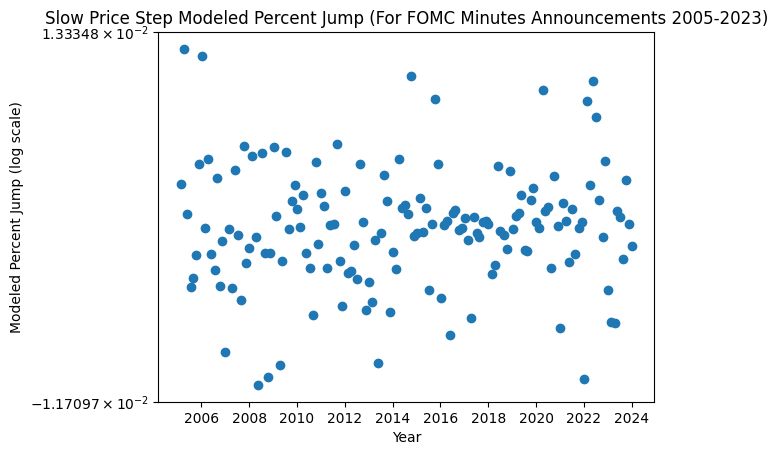

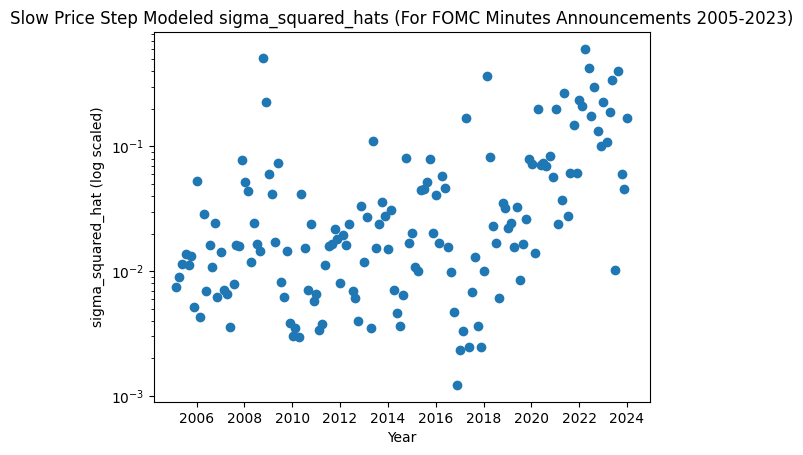

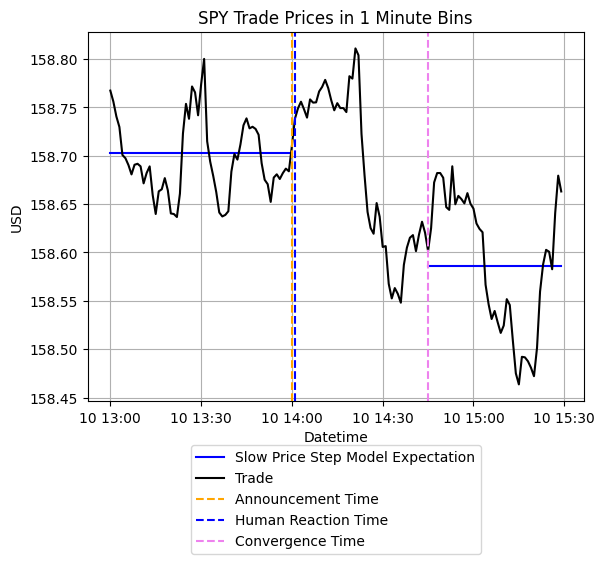

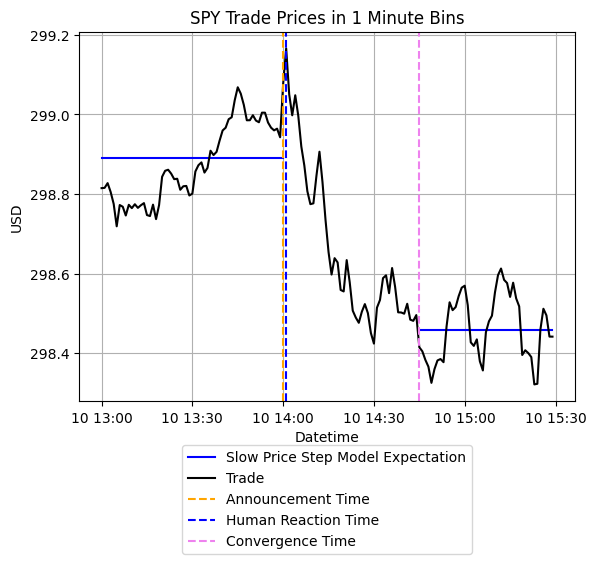

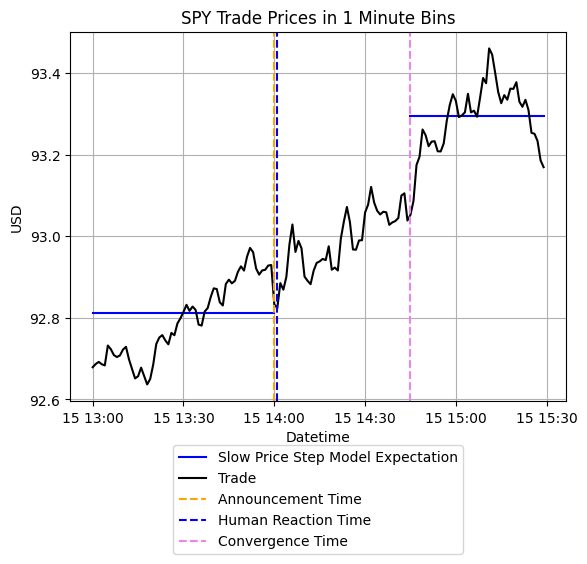

In [8]:
times = [model.time_n for model in models]
basic_mu1_hats = [model.basic_mu1_hat for model in models]
basic_mu2_hats = [model.basic_mu2_hat for model in models]
basic_sigma_squared_hats = [model.basic_sigma_squared_hat for model in models]
basic_percent_jump = [(model.basic_mu2_hat - model.basic_mu1_hat) / model.basic_mu1_hat for model in models]

plt.title("mu1_hats (For FOMC Minutes Announcements 2005-2023)")
plt.scatter(times, basic_mu1_hats)
plt.xlabel("Year")
plt.ylabel("mu1_hat (log scale)")
plt.yscale('log') 
plt.show()

plt.title("mu2_hats (For FOMC Minutes Announcements 2005-2023)")
plt.scatter(times, basic_mu2_hats)
plt.xlabel("Year")
plt.ylabel("mu2_hat (log scale)")
plt.yscale('log')
plt.show()

plt.title("Slow Price Step Modeled Percent Jump (For FOMC Minutes Announcements 2005-2023)")
plt.scatter(times, basic_percent_jump)
plt.xlabel("Year")
plt.ylabel("Modeled Percent Jump (log scale)")
plt.yscale('symlog', linthresh=0.1) 
plt.show()

plt.title("Slow Price Step Modeled sigma_squared_hats (For FOMC Minutes Announcements 2005-2023)")
plt.scatter(times, basic_sigma_squared_hats)
plt.xlabel("Year")
plt.ylabel("sigma_squared_hat (log scaled)")
plt.axhline(y=0, color='black')
plt.yscale('log') 
plt.show()

for i in samples_i:
  models[i].plot_slow_price_step_model()

# Identify HFT Trades

/Users/xander/Desktop/github/senior_thesis/ann_models.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hft_df['DOLLAR_VOLUME'] = hft_df["SIZE"] * hft_df["PRICE"]
/Users/xander/Desktop/github/senior_thesis/ann_models.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hft_df['DOLLAR_VOLUME'] = hft_df["SIZE"] * hft_df["PRICE"]
/Users/xander/Desktop/github/senior_thesis/ann_models.py:107: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

Pearson Correlation Coefficient, pval: (0.33018284159955835, 3.2631230498601515e-05)
Spearman Correlation Coefficient, pval: (0.317214442416911, 6.835633429986143e-05)


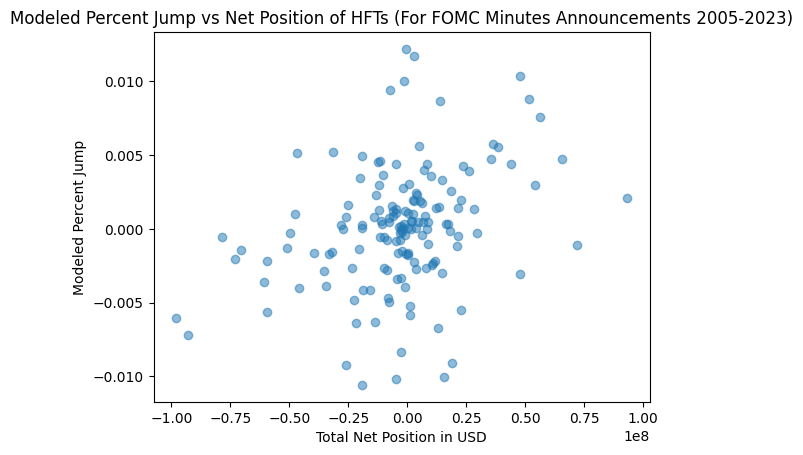

In [9]:
hft_dollar_volumes = [model.get_hft_dollar_volume() for model in models]
hft_trade_volumes = [model.get_hft_trade_volume() for model in models]
hft_dollar_positions = [model.get_hft_dollar_position() for model in models]
profits = [models[i].get_hft_dollar_position()* basic_percent_jump[i] for i in range(len(models))]

plt.title("Modeled Percent Jump vs Net Position of HFTs (For FOMC Minutes Announcements 2005-2023)")
plt.ylabel("Modeled Percent Jump")
plt.xlabel("Total Net Position in USD")
plt.scatter(hft_dollar_positions, basic_percent_jump, alpha=0.5)
# plt.xlim((-1.0*10**6,10**6))
# plt.ylim((-0.1,0.1))

from scipy.stats import pearsonr, spearmanr
correlation_coefficient, p_value = pearsonr(hft_dollar_positions, basic_percent_jump)
print(f"Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(hft_dollar_positions, basic_percent_jump)
print(f"Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

# How has the number of HFT trades during news announcements changed over time?

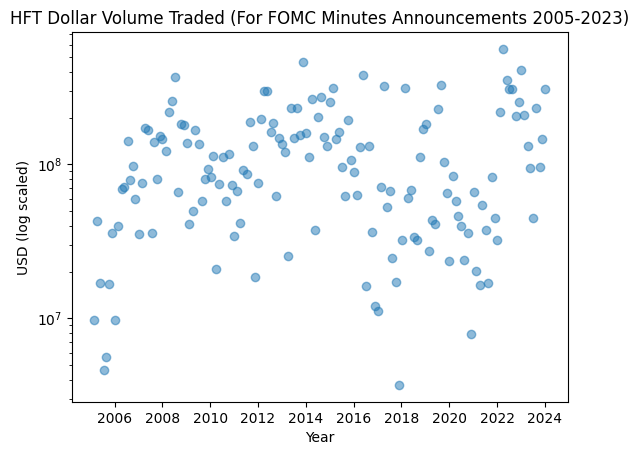

Dollar Volume Pearson Correlation Coefficient, pval: (0.1676409550524945, 0.0389809529949508)
Dollar Volume Spearman Correlation Coefficient, pval: (0.0919634497228658, 0.2598136316442525)


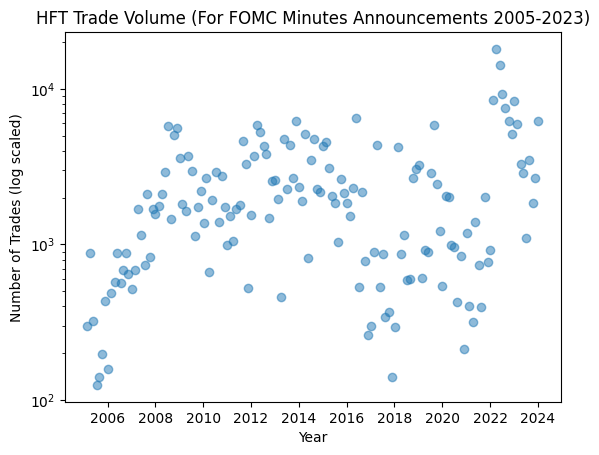

Trade Volume Pearson Correlation Coefficient, pval: (0.28306956713492276, 0.00040984329104241615)
Trade Volume Spearman Correlation Coefficient, pval: (0.21302617314417824, 0.008413752724766518)


In [10]:
seconds_per_year = 365*24*60*60
ftimes = [float(time.timestamp()) for time in times]

plt.scatter(times, hft_dollar_volumes, alpha=0.5)
plt.yscale("log")
plt.title("HFT Dollar Volume Traded (For FOMC Minutes Announcements 2005-2023)")
plt.ylabel("USD (log scaled)")
plt.xlabel("Year")
plt.show()

correlation_coefficient, p_value = pearsonr(ftimes, hft_dollar_volumes)
print(f"Dollar Volume Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(ftimes, hft_dollar_volumes)
print(f"Dollar Volume Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

plt.scatter(times, hft_trade_volumes, alpha=0.5)
plt.yscale("log")
plt.title("HFT Trade Volume (For FOMC Minutes Announcements 2005-2023)")
plt.ylabel("Number of Trades (log scaled)")
plt.xlabel("Year")
plt.show()

correlation_coefficient, p_value = pearsonr(ftimes, hft_trade_volumes)
print(f"Trade Volume Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(ftimes, hft_trade_volumes)
print(f"Trade Volume Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")



# Do HFTs’ fraction of market activity continue to change with volatility when during news announcements?

Pearson Correlation Coefficient, pval: (0.4372534948091713, 1.7764308498645184e-08)
Spearman Correlation Coefficient, pval: (0.3256173155912766, 4.249705607777946e-05)


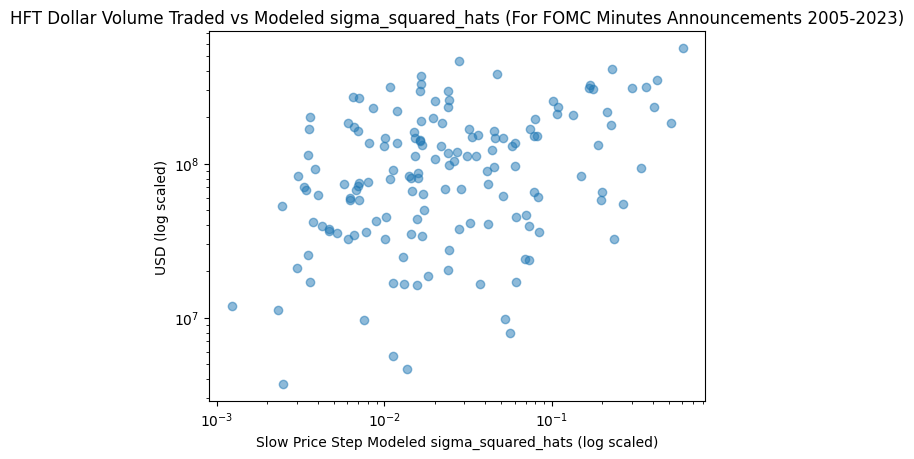

In [11]:
plt.scatter(basic_sigma_squared_hats, hft_dollar_volumes, alpha=0.5)
plt.yscale("log")
plt.xscale("log")
plt.title("HFT Dollar Volume Traded vs Modeled sigma_squared_hats (For FOMC Minutes Announcements 2005-2023)")
plt.ylabel("USD (log scaled)")
plt.xlabel("Slow Price Step Modeled sigma_squared_hats (log scaled)")

correlation_coefficient, p_value = pearsonr(basic_sigma_squared_hats, hft_dollar_volumes)
print(f"Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(basic_sigma_squared_hats, hft_dollar_volumes)
print(f"Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

# Has the profitability of HFT during news announcements changed over time? Specifically, what is the estimated percent change in profits?

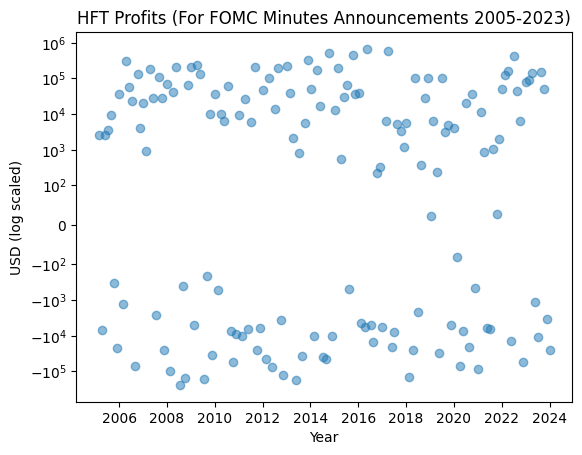

Profit Pearson Correlation Coefficient, pval: (0.038831870838384394, 0.6348022295537041)
Profit Spearman Correlation Coefficient, pval: (-0.01925587244308668, 0.8138482889465528)
total profits: 5716627.344421366


In [12]:
plt.scatter(times, profits, alpha=0.5)
plt.yscale('symlog', linthresh=100) 
plt.title("HFT Profits (For FOMC Minutes Announcements 2005-2023)")
plt.ylabel("USD (log scaled)")
plt.xlabel("Year")
plt.show()

correlation_coefficient, p_value = pearsonr(ftimes, profits)
print(f"Profit Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(ftimes, profits)
print(f"Profit Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")
print(f"total profits: {sum(profits)}")

# Have HFT trades at times of news announcements improved in their ability to shift prices toward the true underlying value of the stock? Specifically, what is the estimated change in price due to HFT and how has it changed over time?

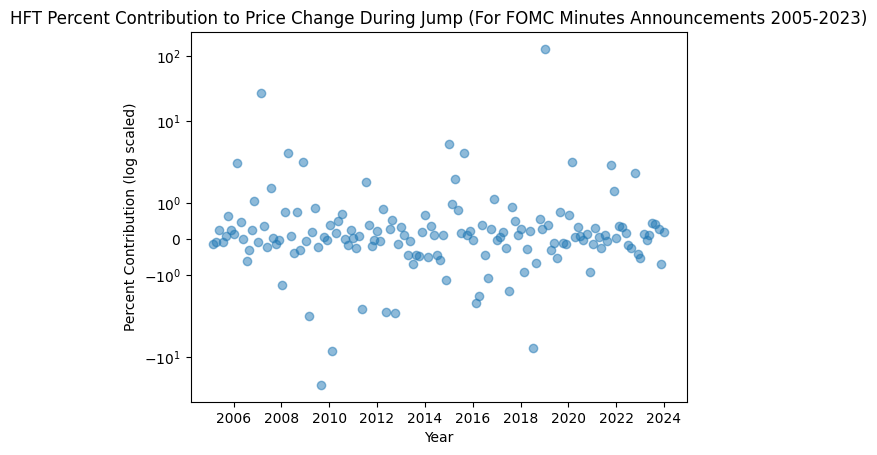

Contribution Pearson Correlation Coefficient, pval: (0.055338449793658935, 0.4983137381233877)
Contribution Spearman Correlation Coefficient, pval: (-0.002576564370113819, 0.9748677277244782)
0.8784989923767855


In [13]:
# contribution provided / percent jump = price change caused by HFT / percent price change according to model
contributions = [model.get_hft_price_change() / (model.basic_mu2_hat - model.basic_mu1_hat) for model in models]

plt.scatter(times, contributions, alpha=0.5)
plt.yscale('symlog', linthresh=2) 
plt.title("HFT Percent Contribution to Price Change During Jump (For FOMC Minutes Announcements 2005-2023)")
plt.ylabel("Percent Contribution (log scaled)")
plt.xlabel("Year")
plt.show()

correlation_coefficient, p_value = pearsonr(ftimes, contributions)
print(f"Contribution Pearson Correlation Coefficient, pval: {correlation_coefficient, p_value}")
correlation_coefficient, p_value = spearmanr(ftimes, contributions)
print(f"Contribution Spearman Correlation Coefficient, pval: {correlation_coefficient, p_value}")

print(sum(contributions)/len(contributions))

In [17]:
sum(basic_percent_jump)/len(basic_percent_jump)*8*10000

5.285183629204023